## Рубежный контроль №1
#### Арзамасцев Артем, ИУ5-62Б
#### Вариант 2

##### Задача №1.
Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.
##### Набор данных
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine
##### Дополнительное требование для группы
Для произвольной колонки данных построить гистограмму.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_wine


data_wine = load_wine()
data = pd.DataFrame(data=np.c_[data_wine['data'], data_wine['target']],
                    columns=list(data_wine['feature_names']) + ['target'])

In [3]:
data.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
153,13.23,3.30,2.28,18.5,98.0,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675.0,2.0
103,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1.0
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0,2.0
129,12.04,4.30,2.38,22.0,80.0,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580.0,1.0
142,13.52,3.17,2.72,23.5,97.0,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520.0,2.0


In [4]:
data.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                          float64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [6]:
# Проверяем данные на пропуски
data.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

Данные не содержат пропуски, значит сделаем их искусственно

In [7]:
for col in ['alcohol', 'ash']:
    data.loc[data.sample(frac=0.1).index, col] = np.nan

In [8]:
data.isnull().sum()

alcohol                         18
malic_acid                       0
ash                             18
alcalinity_of_ash                0
magnesium                        0
total_phenols                    0
flavanoids                       0
nonflavanoid_phenols             0
proanthocyanins                  0
color_intensity                  0
hue                              0
od280/od315_of_diluted_wines     0
proline                          0
target                           0
dtype: int64

Видим пропуски. Устраняем их удалением строк, с пропущенными значениями.

In [9]:
data.dropna(inplace=True)
data.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

Для анализа взаимосвязей между переменными в данных (корреляционный анализ) построим корреляционную матрицу.

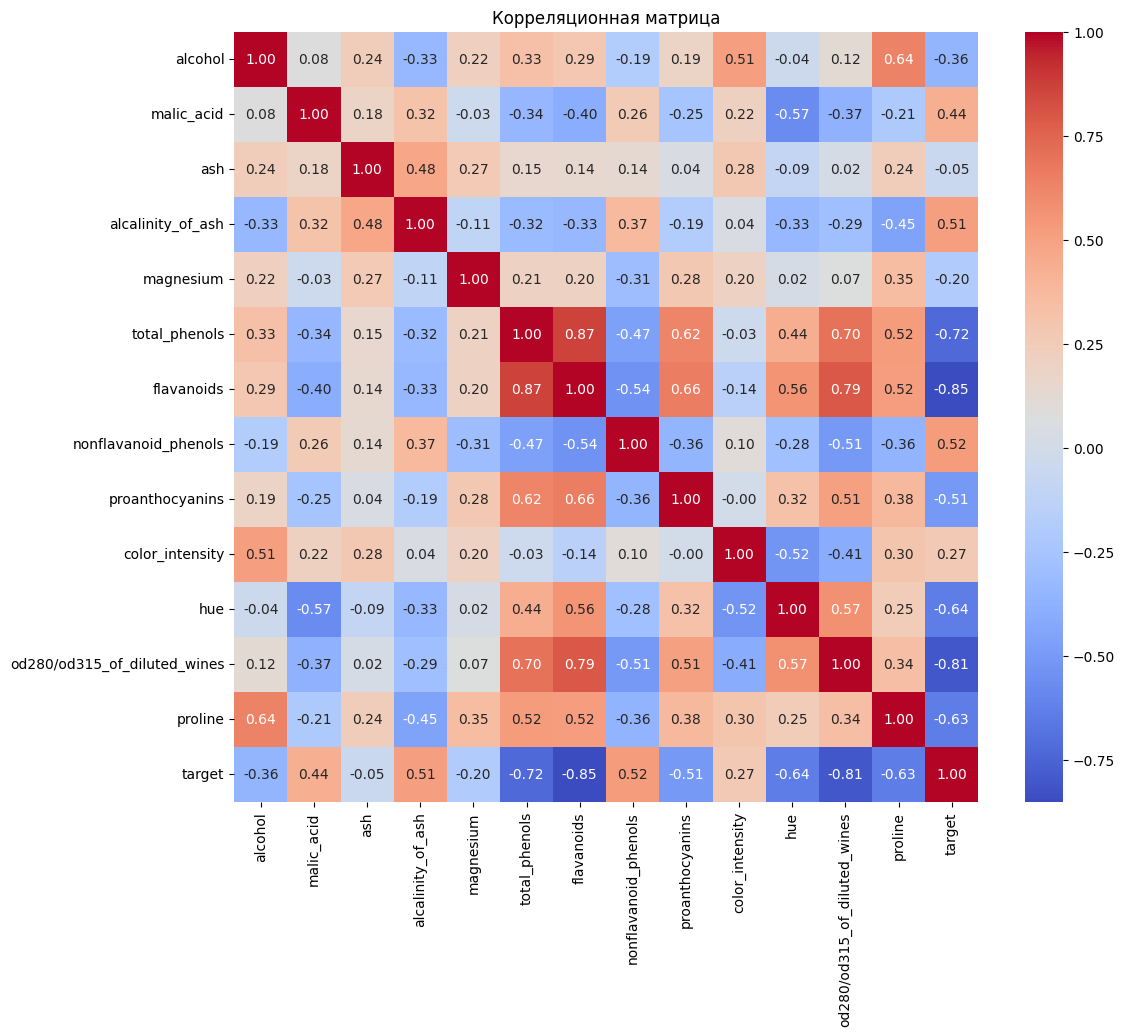

In [10]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

total_phenols, flavanoids, od280/od315_of_diluted_wines, имеют высокие отрицательные корреляции с целевой переменной. Это может означать, что эти признаки могут быть полезны для построения модели машинного обучения.

alcohol, ash, color_intensity и magnesium имеют низкие корреляции с целевой переменной. Это может означать, что эти признаки могут быть менее полезны для построения модели, хотя они могут быть важны для других аспектов анализа.

Некоторые признаки имеют высокую корреляцию между собой, что может указывать на избыточность признаков. Например, total_phenols и flavanoids, od280/od315_of_diluted_wines и total_phenols, od280/od315_of_diluted_wines и flavanoids имеют высокую положительную корреляцию, что может означать, что они могут быть избыточными и одной из них может быть достаточно для модели.

### Гистограмма для колонки alcohol:

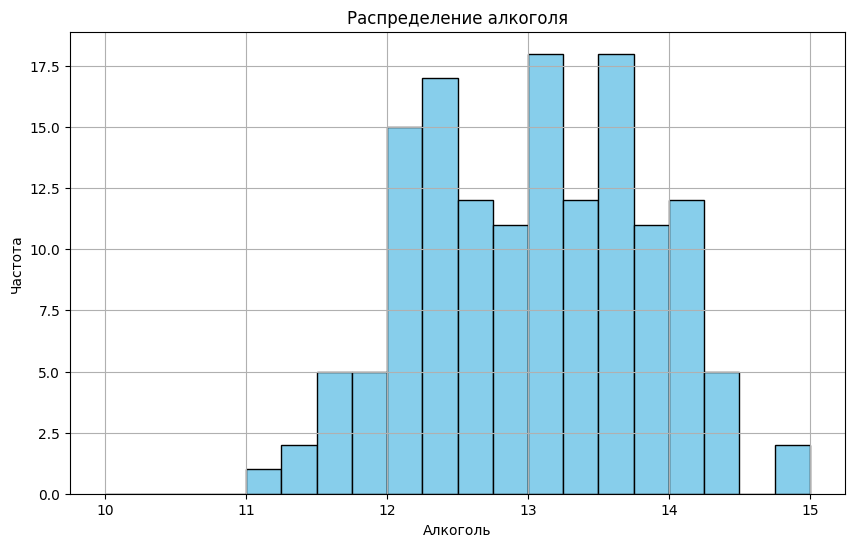

In [11]:
alcohol = data['alcohol']

plt.figure(figsize=(10, 6))
plt.hist(alcohol, bins=20, range=(10, 15), color='skyblue', edgecolor='black')
plt.title('Распределение алкоголя')
plt.xlabel('Алкоголь')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

### Вывод:

В датасете присутствуют как сильно коррелирующие, так и слабо коррелирующие с целевым признаки. Это позволяет построить более гибкие и устойчивые модели, учитывая различные аспекты данных. Целевой признак сильно коррелирует с total_phenols, flavonoids и с od280/od315. Эти признаки стоит оставить в модели. Остальные признаки имеют более слабую корреляцию. Их роль также важна для понимания обратных связей в данных и может быть использована для повышения точности предсказаний.